# Task 2: Merging items,order and product data set

In [2]:
# importing all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [3]:
pd.set_option("display.max_columns",60)

In [4]:
# Reading all the tables
item = pd.read_csv("olist_order_items_dataset.csv")
order = pd.read_csv("olist_orders_dataset.csv")
product = pd.read_csv("olist_products_dataset.csv")

## Item table

In [5]:
# overview to our table
item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [107]:
# describing item table
item.describe()

,order_item_id,price,freight_value,year,month
count,112650.000000,112650.000000,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320,2017.551735,6.115828
std,0.705124,183.633928,15.806405,0.504091,3.219723
min,1.000000,0.850000,0.000000,2016.000000,1.000000
25%,1.000000,39.900000,13.080000,2017.000000,3.000000
50%,1.000000,74.990000,16.260000,2018.000000,6.000000
75%,1.000000,134.900000,21.150000,2018.000000,8.000000
max,21.000000,6735.000000,409.680000,2020.000000,12.000000


In [6]:
# check for total number of null values
item.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [7]:
#there are no null values

In [8]:
# check for data type for features in table
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [9]:
# we have to change the data type of feature: shipping_limit_date
# converting shipping_limit_date into datetime format that was previously object type.
item['shipping_limit_date'] = pd.to_datetime(item['shipping_limit_date'], format='%Y-%m-%d %H:%M:%S')
item['shipping_limit_date']

0        2017-09-19 09:45:35
1        2017-05-03 11:05:13
2        2018-01-18 14:48:30
3        2018-08-15 10:10:18
4        2017-02-13 13:57:51
                 ...        
112645   2018-05-02 04:11:01
112646   2018-07-20 04:31:48
112647   2017-10-30 17:14:25
112648   2017-08-21 00:04:32
112649   2018-06-12 17:10:13
Name: shipping_limit_date, Length: 112650, dtype: datetime64[ns]

In [79]:
def time(t):
    if int(t)>=5 and int(t)<12:
        return 'morning'
    elif int(t)>=12 and int(t)<17:
        return 'afternoon'
    elif int(t)>=17 and int(t)<24:
        return 'evening'
    else:
        return 'midnight'

In [82]:
# creating columns year and month
item['year'] = item['shipping_limit_date'].dt.year
item['month'] = item['shipping_limit_date'].dt.month
item['timing'] = (item['shipping_limit_date'].dt.hour).apply(lambda x: time(x))

In [83]:
item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,year,month,timing
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,2017,9,morning
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2017,5,morning
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,2018,1,afternoon
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,2018,8,morning
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2017,2,afternoon


## Order table

In [84]:
order = pd.read_csv("olist_orders_dataset.csv")

In [85]:
# overview to the order table
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [108]:
# describing order table
order.describe()

,delayed,delivery_time_duration
count,99441.000000,99441
mean,0.080088,12 days 11:39:09.901348538
std,0.271430,9 days 10:47:43.111400344
min,0.000000,0 days 12:48:07
25%,0.000000,6 days 20:58:16
50%,0.000000,10 days 03:01:21
75%,0.000000,15 days 09:27:13
max,1.000000,209 days 15:05:12


In [86]:
# check for null values
order.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [87]:
# there are some null values and thus we have to deal with those null values.

In [88]:
# overview to the data type of each feature
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [89]:
# converting all the date related features from object type to date time format
order['order_purchase_timestamp'] = pd.to_datetime(order['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')
order['order_approved_at'] = pd.to_datetime(order['order_approved_at'], format='%Y-%m-%d %H:%M:%S')
order['order_delivered_carrier_date'] = pd.to_datetime(order['order_delivered_carrier_date'], format='%Y-%m-%d %H:%M:%S')
order['order_delivered_customer_date'] = pd.to_datetime(order['order_delivered_customer_date'], format='%Y-%m-%d %H:%M:%S')
order['order_estimated_delivery_date'] = pd.to_datetime(order['order_estimated_delivery_date'], format='%Y-%m-%d %H:%M:%S')

In [90]:
# we have taken median of differences between order_approved_at and order_purchased and then filled the nan values with sum of order_purchased and diff
diff = (order['order_approved_at'] - order['order_purchase_timestamp']).median()
order['order_approved_at'].fillna(order['order_purchase_timestamp'] + diff,inplace=True)

In [91]:
# we have taken median of differences between order_delivered_carrier_date and order_approved_at and then filled the nan values with sum of order_approved_at and diff
diff = (order['order_delivered_carrier_date'] - order['order_approved_at']).median()
order['order_delivered_carrier_date'].fillna(order['order_approved_at'] + diff,inplace=True)

In [92]:
# we have taken median of differences between order_delivered_customer_date and order_delivered_carrier_date and then filled the nan values with sum of order_delivered_carrier_date and diff
diff = (order['order_delivered_customer_date'] - order['order_delivered_carrier_date']).median()
order['order_delivered_customer_date'].fillna(order['order_delivered_carrier_date'] + diff,inplace=True)

In [93]:
# creating one more column delayed or not where 0=within time and 1=delayed
order['delayed'] = np.where(order['order_delivered_customer_date']>order['order_estimated_delivery_date'],1,0)

In [94]:
# creating new column ie. delivery time duration = time duration between delivered to customer date and purchase timestamp
order['delivery_time_duration'] = order['order_delivered_customer_date'] - order['order_purchase_timestamp']

In [95]:
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delayed,delivery_time_duration
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0,8 days 10:28:40
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,0,13 days 18:46:08
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0,9 days 09:27:40
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0,13 days 05:00:36
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0,2 days 20:58:23


## Product table

In [23]:
# overview to product table
product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [109]:
# describing product table
product.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4281.908773,16.913945,13.637140,12.078681
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [24]:
# overview to the data type of each feature
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [25]:
# check for null values
product.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [26]:
# filling minute null values 
product['product_weight_g'].fillna(product['product_weight_g'].mean(),inplace=True)
product['product_length_cm'].fillna(product['product_length_cm'].mean(),inplace=True)
product['product_height_cm'].fillna(product['product_height_cm'].mean(),inplace=True)
product['product_width_cm'].fillna(product['product_width_cm'].mean(),inplace=True)

## Merging all three tables

In [96]:
# merging all tables
merged_data = pd.merge(order,item,on='order_id')
merged_data = merged_data.merge(product,on='product_id')

In [97]:
merged_data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'delayed', 'delivery_time_duration', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value', 'year',
       'month', 'timing', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

<AxesSubplot:>

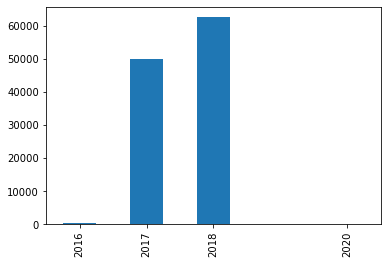

In [98]:
# we need to understand the growth of purchase from olist store within these years.
merged_data['year'].value_counts().plot.bar()

In [30]:
# this shows that 2017 shows a sudden growth in sales as compared to 2016.

<AxesSubplot:>

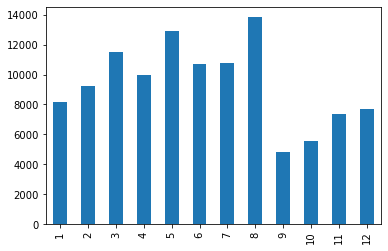

In [99]:
# we will calculate purchase count from olist store as per month
merged_data['month'].value_counts().plot.bar()

In [32]:
# this shows that most of the people prefer not to go outdoors for shopping in rainy season and thus buy from olist store

<AxesSubplot:xlabel='delayed'>

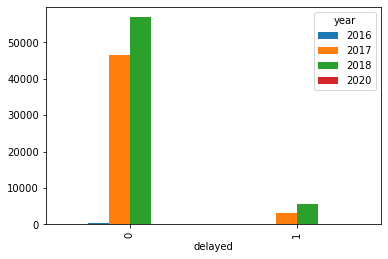

In [100]:
merged_data.groupby('year').delayed.value_counts().unstack(0).plot.bar()

<AxesSubplot:xlabel='delayed'>

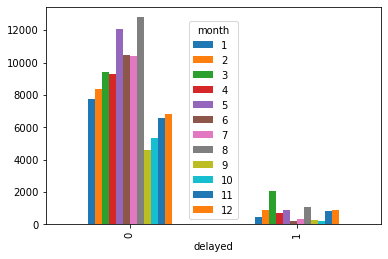

In [101]:
merged_data.groupby('month').delayed.value_counts().unstack(0).plot.bar()

<AxesSubplot:xlabel='delayed'>

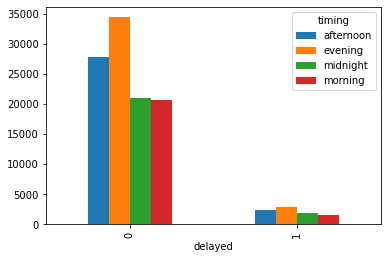

In [104]:
merged_data.groupby('timing').delayed.value_counts().unstack(0).plot.bar()

<AxesSubplot:xlabel='month'>

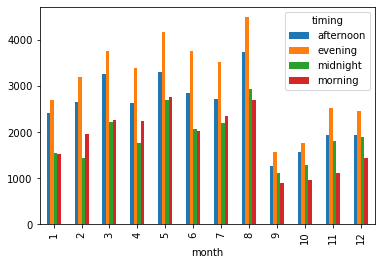

In [106]:
merged_data.groupby('timing').month.value_counts().unstack(0).plot.bar()